In [1]:
import quantstats as qs
import pandas as pd
import yfinance as yf
import numpy as np

In [2]:
df = yf.download("BTC-USD")["Close"].to_frame()

[*********************100%***********************]  1 of 1 completed


In [3]:
short_window = 50
long_window = 200
df["SMAs"] = df.Close.rolling(short_window).mean()
df["SMAl"] = df.Close.rolling(long_window).mean()
df = df.iloc[199:]
df["Signal"] = np.where(df.SMAs > df.SMAl, 1.0, 0.0)
df["Posicion"] = df.Signal.diff()

In [20]:
cap = float(100000.0)
pos = pd.DataFrame(index = df.index).fillna(0.0)
pos["BTC"] = 1 * df.Signal

portfolio = pos.multiply(df.Close, axis = 0)
pos_dif = pos.diff()
portfolio["Holdings"] = (pos.multiply(df.Close, axis = 0)).sum(axis = 1)
portfolio["Cash"] = cap - (pos_dif.multiply(df.Close, axis = 0)).sum(axis = 1).cumsum()
portfolio["Total"] = portfolio.Cash + portfolio.Holdings
portfolio["Returns"] = portfolio.Total.pct_change()

In [21]:
portfolio

,BTC,Holdings,Cash,Total,Returns
Date,,,,,
2015-04-04,0.0,0.0,100000.000000,100000.000000,NaN
2015-04-05,0.0,0.0,100000.000000,100000.000000,0.0
2015-04-06,0.0,0.0,100000.000000,100000.000000,0.0
2015-04-07,0.0,0.0,100000.000000,100000.000000,0.0
2015-04-08,0.0,0.0,100000.000000,100000.000000,0.0
...,...,...,...,...,...
2021-07-15,0.0,0.0,133890.973618,133890.973618,0.0
2021-07-16,0.0,0.0,133890.973618,133890.973618,0.0
2021-07-17,0.0,0.0,133890.973618,133890.973618,0.0


                    Strategy
------------------  ----------
Start Period        2015-04-04
End Period          2021-07-20
Risk-Free Rate      0.0%
Time in Market      68.0%

Cumulative Return   33.89%
CAGR%               4.74%

Sharpe              0.46
Sortino             0.68
Sortino/√2          0.48

Max Drawdown        -18.56%
Longest DD Days     1095

Gain/Pain Ratio     0.17
Gain/Pain (1M)      1.11

Payoff Ratio        0.94
Profit Factor       1.17
Common Sense Ratio  1.37
CPC Index           0.61
Tail Ratio          1.17
Outlier Win Ratio   12.68
Outlier Loss Ratio  6.19

MTD                 0.0%
3M                  -13.33%
6M                  -0.13%
YTD                 5.2%
1Y                  24.6%
3Y (ann.)           7.91%
5Y (ann.)           5.94%
10Y (ann.)          4.74%
All-time (ann.)     4.74%

Avg. Drawdown       -1.17%
Avg. Drawdown Days  36
Recovery Factor     1.83
Ulcer Index         inf


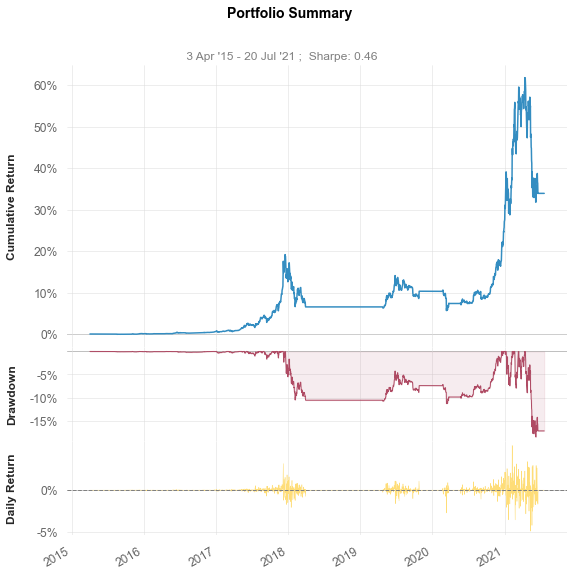

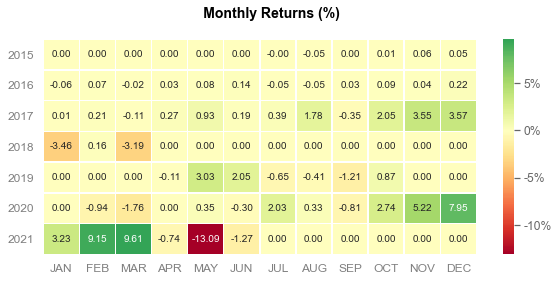

In [22]:
qs.reports.basic(portfolio.Returns)